# ANOMALY DETECTION ON MACHINE FAILURES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, re, time
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, silhouette_score

## EDA & Preprocessing

In [2]:
path = 'BearingVibration_Dataset.csv'
dataframe = pd.read_csv(path)
dataframe

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659
...,...,...,...,...,...
977,2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
978,2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
979,2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
980,2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


In [3]:
dataframe.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,982.000000,982.000000,982.000000,982.000000
mean,0.080951,0.078543,0.081351,0.047830
std,0.040200,0.011789,0.011607,0.009549
min,0.001168,0.000767,0.000716,0.001699
25%,0.060773,0.074240,0.076829,0.043951
50%,0.062021,0.075206,0.078187,0.044524
75%,0.083277,0.077458,0.080575,0.048130
max,0.453335,0.161016,0.151299,0.119047


In [4]:
print("NaN in Data :\n",
       dataframe.isnull().sum().sum())
dup = dataframe.duplicated().any() 
print("\nDuplicate data : \n", dup)

NaN in Data :
 0

Duplicate data : 
 False


In [5]:
print(dataframe.shape)
data= dataframe.sample(frac = 0.2,random_state=1)
print(data.shape)

(982, 5)
(196, 5)


In [17]:
df = dataframe.copy()
df = df.iloc[:, 1:]
dataf = dataframe.copy()
dataf = dataf.iloc[:, 1:]

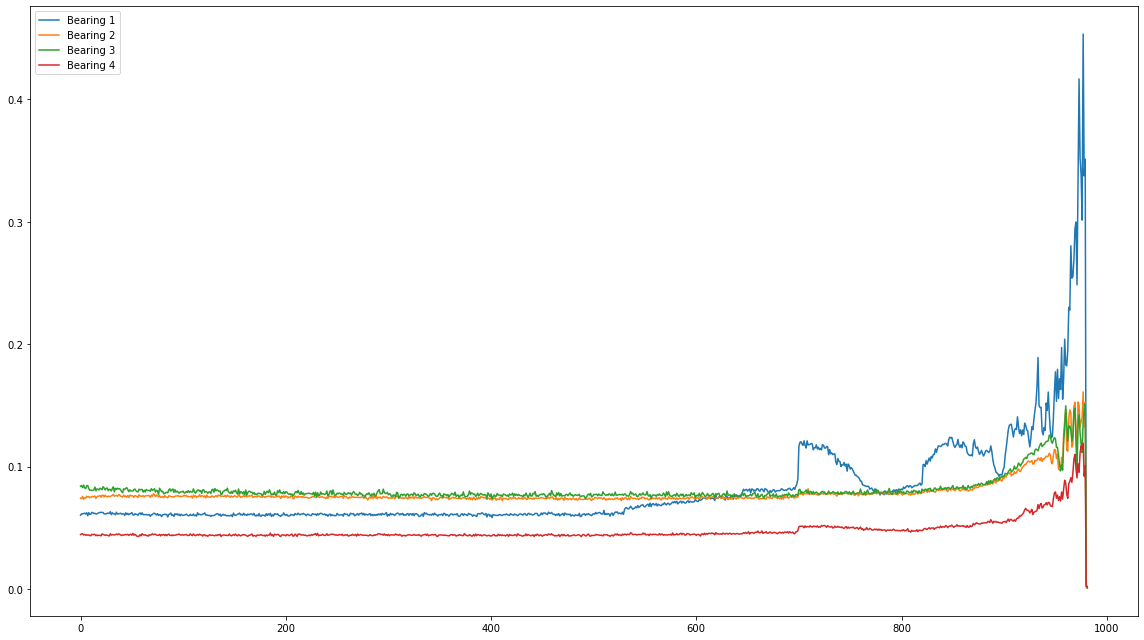

In [7]:
fig = plt.figure(figsize=(16, 9))
plt.plot(dataf["Bearing 1"], label='Bearing 1')
plt.plot(dataf["Bearing 2"], label='Bearing 2')
plt.plot(dataf["Bearing 3"], label='Bearing 3')
plt.plot(dataf["Bearing 4"], label='Bearing 4')
plt.legend()
fig.tight_layout()

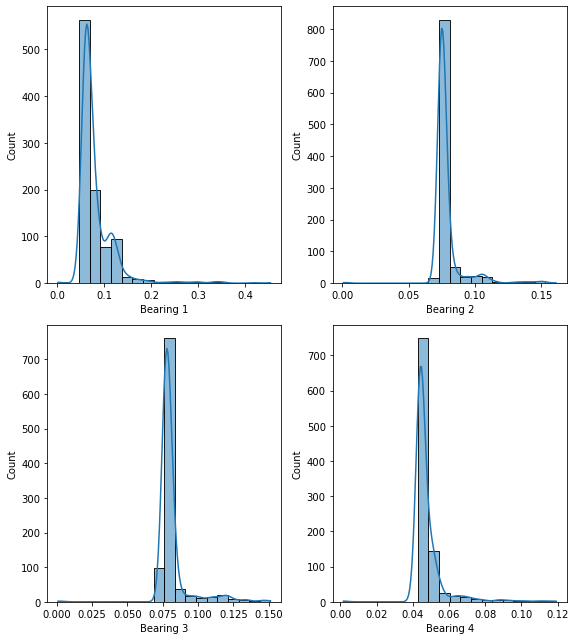

In [8]:
fig = plt.figure(figsize=(16, 9))
f_bearing1 = fig.add_subplot(2,4,1) 
f_bearing2 = fig.add_subplot(2,4,2) 
f_bearing3 = fig.add_subplot(2,4,5)
f_bearing4 = fig.add_subplot(2,4,6)

sns.histplot(dataframe['Bearing 1'], ax=f_bearing1, bins=20, kde=True)
sns.histplot(dataframe['Bearing 2'], ax=f_bearing2, bins=20, kde=True)
sns.histplot(dataframe['Bearing 3'], ax=f_bearing3, bins=20, kde=True)
sns.histplot(dataframe['Bearing 4'], ax=f_bearing4, bins=20, kde=True)

fig.tight_layout()

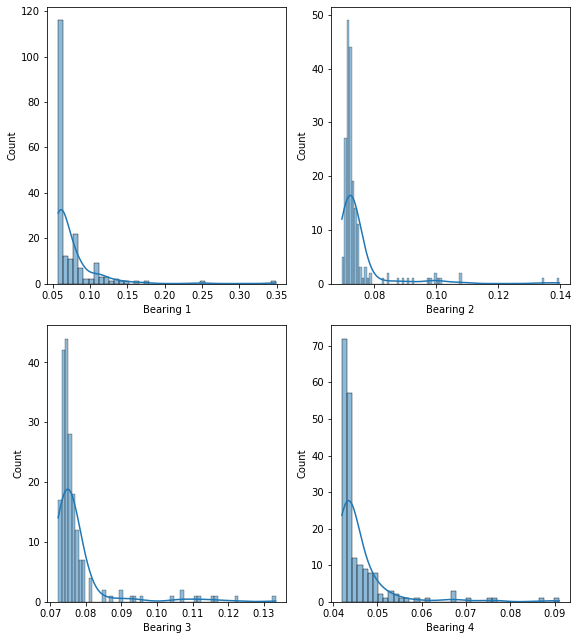

In [9]:
figure = plt.figure(figsize=(16, 9))
log_bearing1 = figure.add_subplot(2,4,1) 
log_bearing2 = figure.add_subplot(2,4,2) 
log_bearing3 = figure.add_subplot(2,4,5) 
log_bearing4 = figure.add_subplot(2,4,6)

bearing1_log=np.log(1 + data['Bearing 1'])
sns.histplot(bearing1_log, ax=log_bearing1, kde=True)

bearing1_log=np.log(1 + data['Bearing 2'])
sns.histplot(bearing1_log, ax=log_bearing2, kde=True)

bearing1_log=np.log(1 + data['Bearing 3'])
sns.histplot(bearing1_log, ax=log_bearing3, kde=True)

bearing1_log=np.log(1 + data['Bearing 4'])
sns.histplot(bearing1_log, ax=log_bearing4, kde=True)

figure.tight_layout()

## Mencari Kluster

Text(0, 0.5, 'Silhouette Score')

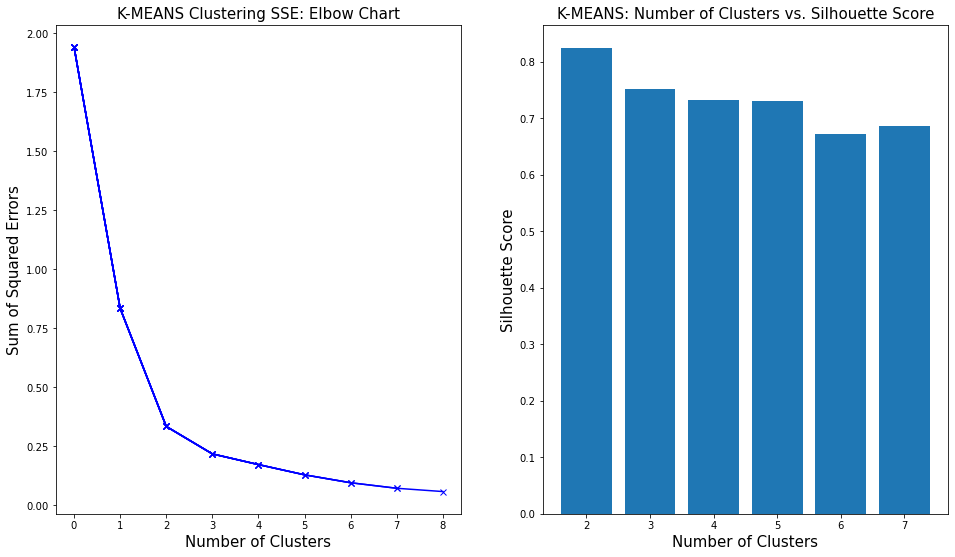

In [10]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1)
kmean_sil = figure.add_subplot(1,2,2)

n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15) 

## Agglomerative Cluster

In [11]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(df)
labels = agglo.labels_
hasil_agglo=pd.concat([dataf, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,cluster
0,0.060236,0.074227,0.083926,0.044443,0
1,0.061455,0.073844,0.084457,0.045081,0
2,0.061361,0.075609,0.082837,0.045118,0
3,0.061665,0.073279,0.084879,0.044172,0
4,0.061944,0.074593,0.082626,0.044659,0
...,...,...,...,...,...
977,0.453335,0.161016,0.137440,0.119047,1
978,0.337583,0.132400,0.144992,0.092125,1
979,0.351111,0.152266,0.151299,0.100817,1
980,0.001857,0.003732,0.003656,0.001786,0


In [12]:
hasil_agglo.loc[(hasil_agglo["cluster"] != 0)].head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,cluster
933,0.189086,0.106937,0.112925,0.069001,1
950,0.177413,0.113498,0.122518,0.079301,1
952,0.179450,0.109826,0.115634,0.076731,1
956,0.197247,0.107478,0.101606,0.079207,1
958,0.172429,0.126712,0.119740,0.081871,1


In [13]:
print("Total Anomaly w/ Agglo Cluster :")
len(hasil_agglo.loc[(hasil_agglo["cluster"] != 0)])

Total Anomaly w/ Agglo Cluster :


26

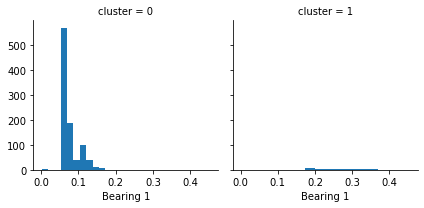

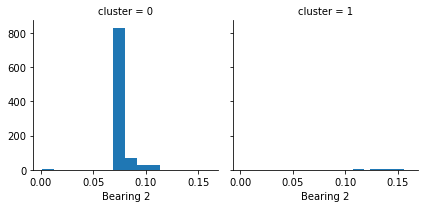

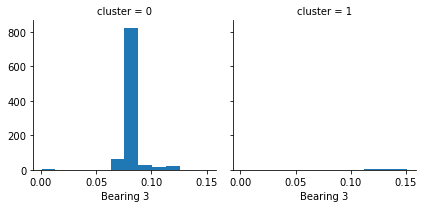

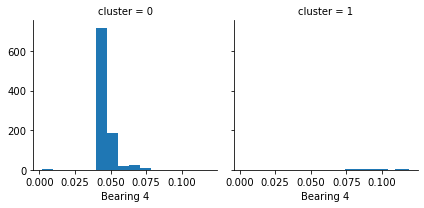

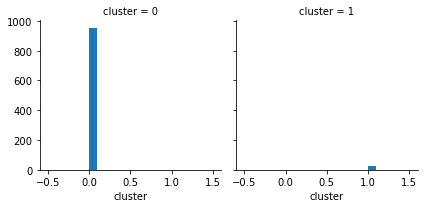

In [14]:
# visualisasi hasil agglomerative clustering
for i in hasil_agglo:
    grid = sns.FacetGrid(hasil_agglo, col='cluster')
    grid.map(plt.hist, i)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
dist = 1 - cosine_similarity(hasil_agglo)

pca = PCA(2)
pca = pca.fit_transform(dist)
pca.shape

(982, 2)

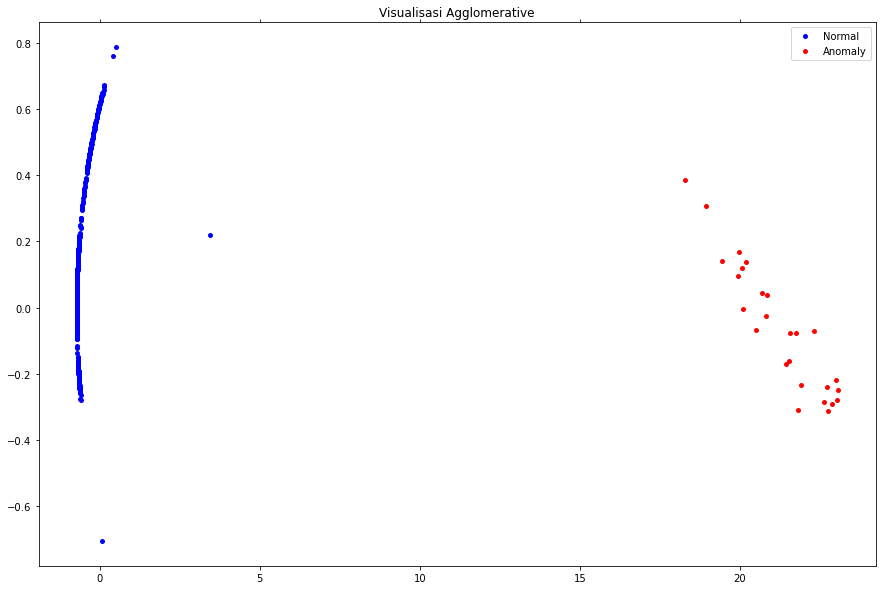

In [16]:
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'blue', 1: 'red'}
label_pca = {0: 'Normal', 1: 'Anomaly'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi Agglomerative")
plt.show()

## K-Means Cluster

In [18]:
kmean= KMeans(2)
kmean.fit(df)
labels=kmean.labels_
kmean_clusters=pd.concat([dataf, pd.DataFrame({'cluster':labels})], axis=1)
kmean_clusters

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,cluster
0,0.060236,0.074227,0.083926,0.044443,0
1,0.061455,0.073844,0.084457,0.045081,0
2,0.061361,0.075609,0.082837,0.045118,0
3,0.061665,0.073279,0.084879,0.044172,0
4,0.061944,0.074593,0.082626,0.044659,0
...,...,...,...,...,...
977,0.453335,0.161016,0.137440,0.119047,1
978,0.337583,0.132400,0.144992,0.092125,1
979,0.351111,0.152266,0.151299,0.100817,1
980,0.001857,0.003732,0.003656,0.001786,0


In [19]:
kmean_clusters.loc[(kmean_clusters["cluster"] != 0)].head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,cluster
930,0.145769,0.105229,0.113386,0.063052,1
931,0.151883,0.104712,0.114320,0.063509,1
932,0.165063,0.105111,0.113725,0.064146,1
933,0.189086,0.106937,0.112925,0.069001,1
934,0.149938,0.106622,0.115555,0.065636,1


In [20]:
print("Total Anomaly w/ K-Means Cluster :")
len(kmean_clusters.loc[(kmean_clusters["cluster"] != 0)])

Total Anomaly w/ K-Means Cluster :


43

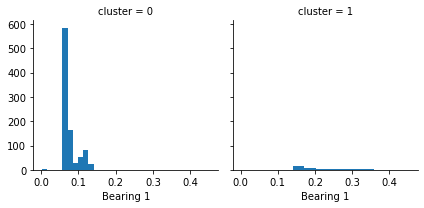

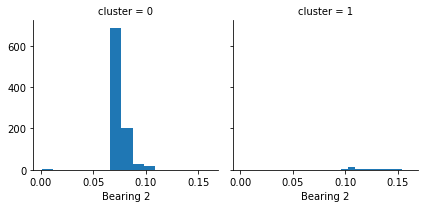

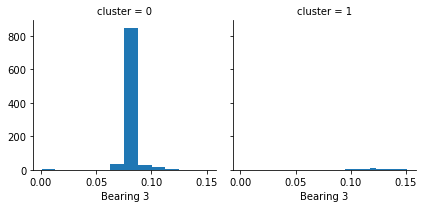

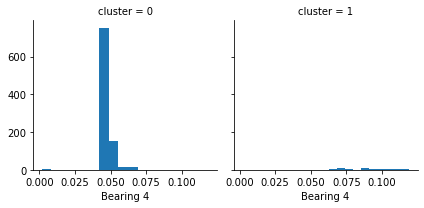

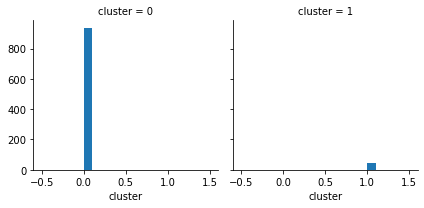

In [21]:
for i in kmean_clusters:
    grid = sns.FacetGrid(kmean_clusters, col='cluster')
    grid.map(plt.hist, i)

In [22]:
dist = 1 - cosine_similarity(kmean_clusters)

pca = PCA(2)
pca = pca.fit_transform(dist)
pca.shape

(982, 2)

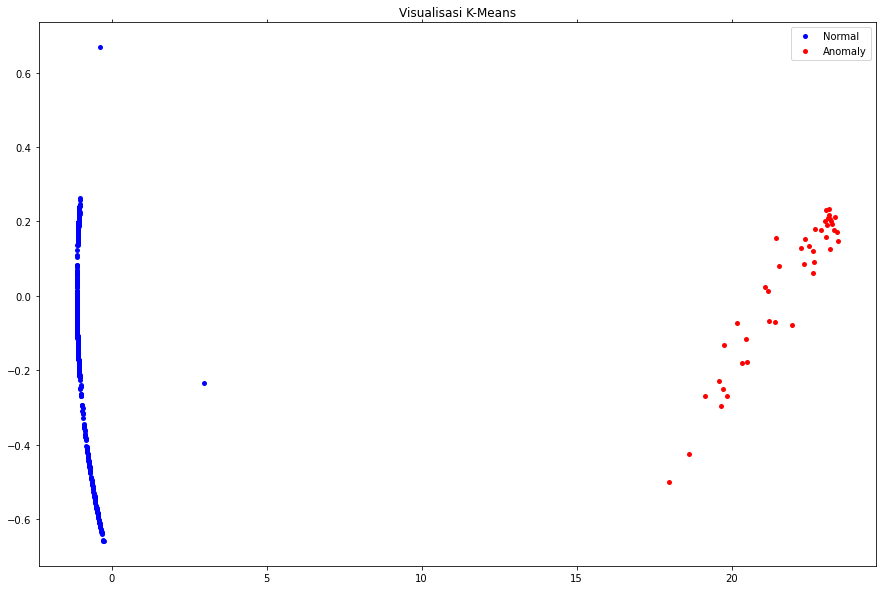

In [23]:
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'blue', 1: 'red'}
label_pca = {0: 'Normal', 1: 'Anomaly'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi K-Means")
plt.show()